In [2]:
# want to look at segments with ratios >1
# find out what tracers, look at UT and BL distributions 
# date created: 3/26/2020
# author: sofia chelpon

In [2]:
import numpy as np 
import xarray as xr
import pandas as pd 
import datetime 
import seaborn as sns
import datetime as dt
from scipy.optimize import least_squares

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits import mplot3d

%matplotlib inline
%config inlinebackend.figure_format='retina'

In [4]:
# load in both toga and awas data pickles 
awas_df = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_ratios/awas_data_df.pkl")
toga_df = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_ratios/toga_data_df.pkl")
master_list = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_ratios/contrast_ratios.pkl")

In [5]:
##########################################################################################
########## find which tracers are > 0.9 
gt = master_list[master_list['BL_tau'] < 100]
gt_campavg = gt[gt['RF11_CampAvg'] > 0.9]
gt_campavg.drop('TROPO_tau', axis = 1).drop('UT_tau', axis = 1)

gt_9days = gt[gt['RF11_9days'] > 0.9]
gt_9days.drop('TROPO_tau', axis = 1).drop('UT_tau', axis = 1)

gt_rf11 = gt[gt['RF11_RF11'] > 0.9]
gt_rf11.drop('TROPO_tau', axis = 1).drop('UT_tau', axis = 1)

In [6]:
########## plot distributions - UT 
########## isolate data in UT for RF11 alone, and camp avg. 
# RF11 only 
gt_ut_rf11 = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                                          & (toga_df['Flight'] == 'RF11')]
gt_ut_rf11 = gt_ut_rf11[['Benzene', 'C3H8', 'Dibromomethane', 'Dichloromethane', 'Chloroform']]

# campaign average, all RFS 
gt_ut_campavg = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)]
gt_ut_campavg = gt_ut_campavg[['Benzene', 'C3H8', 'Dibromomethane', 'Dichloromethane', 'Chloroform']]

# campaign average, no RF11 
gt_ut_campavg_no11 = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                & (toga_df['Flight'] != 'RF11')]
gt_ut_campavg_no11 = gt_ut_campavg_no11[['Benzene', 'C3H8', 'Dibromomethane', 'Dichloromethane', 'Chloroform']] 


########## organize by tracer 
UT_Benzene = pd.DataFrame()
UT_Benzene['C.A.'] = gt_ut_campavg['Benzene']
UT_Benzene['RF11'] = gt_ut_rf11['Benzene']
#Benzene['C.A. no RF11'] = gt_ut_campavg_no11['Benzene']

UT_C3H8 = pd.DataFrame()
UT_C3H8['C.A.'] = gt_ut_campavg['C3H8']
UT_C3H8['RF11'] = gt_ut_rf11['C3H8']
#C3H8['C.A. no RF11'] = gt_ut_campavg_no11['C3H8']

UT_Dibromomethane = pd.DataFrame()
UT_Dibromomethane['C.A.'] = gt_ut_campavg['Dibromomethane']
UT_Dibromomethane['RF11'] = gt_ut_rf11['Dibromomethane']
#Dibromomethane['C.A. no RF11'] = gt_ut_campavg_no11['Dibromomethane']

UT_Dichloromethane = pd.DataFrame()
UT_Dichloromethane['C.A.'] = gt_ut_campavg['Dichloromethane']
UT_Dichloromethane['RF11'] = gt_ut_rf11['Dichloromethane']
#Dichloromethane['C.A. no RF11'] = gt_ut_campavg_no11['Dichloromethane']

UT_Chloroform = pd.DataFrame()
UT_Chloroform['C.A.'] = gt_ut_campavg['Chloroform']
UT_Chloroform['RF11'] = gt_ut_rf11['Chloroform']
#RF11'] = gt_ut_campavg_no11['Chloroform']


In [7]:
####### define plotting function 
sns.set(style="whitegrid")

def make_bplot(mydata, myname, where):
    fig = plt.figure(figsize=(4, 5))
    if (where == 'UT'):
        mypal = "Set1"
    else:
        mypal = "Set2"
    a = sns.boxplot(data = mydata, linewidth = 2, showmeans=True, palette=mypal, 
               meanprops={"marker":"x","markersize": "9", "markerfacecolor":"white", "markeredgecolor":"black"})
    a.set_title(myname + ' Distribution in the ' + where)
    svname = where+'_dist_'+str(myname) + '.pdf'
    fig.savefig('/Volumes/scdrive2/TTS_2020/examine_ratios/supp_figures/' + svname)  


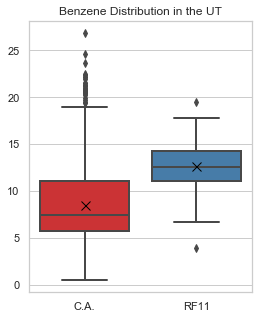

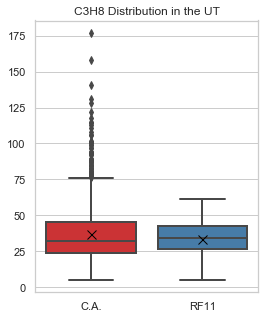

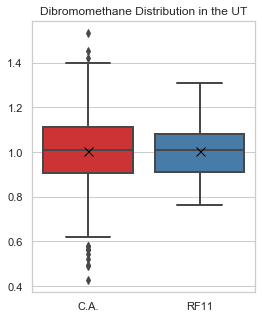

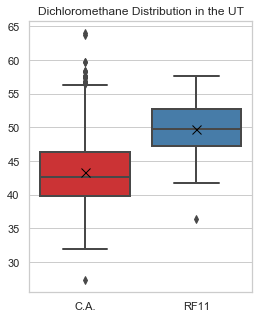

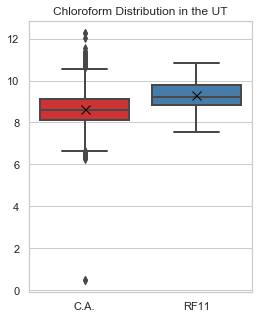

In [8]:
# plot 
where = 'UT'

make_bplot(UT_Benzene, 'Benzene', where)
make_bplot(UT_C3H8, 'C3H8', where)
make_bplot(UT_Dibromomethane, 'Dibromomethane', where)
make_bplot(UT_Dichloromethane, 'Dichloromethane', where)
make_bplot(UT_Chloroform, 'Chloroform', where)

In [10]:
########## plot distributions - BL
# isolate data in UT for RF11 alone, and camp avg. 
gt_bl_campavg = toga_df.loc[(toga_df['GGALT'] < 2000)]
gt_bl_campavg = gt_bl_campavg[['Benzene', 'C3H8', 'Dibromomethane', 'Dichloromethane', 'Chloroform', 'Bromoform']]
gt_bl_campavg = gt_bl_campavg.assign(Location = 1)

gt_bl_9day = toga_df[toga_df['Flight'].isin(['RF11', 'RF10', 'RF09', 'RF08'])]
gt_bl_9day = gt_bl_9day[gt_bl_9day['GGALT'] < 2000]

gt_bl_rf11 = toga_df.loc[(toga_df['GGALT'] < 2000) & (toga_df['Flight'] == 'RF11')]
gt_bl_rf11 = gt_bl_rf11[['Benzene', 'C3H8', 'Dibromomethane', 'Dichloromethane', 'Chloroform', 'Bromoform']]
gt_bl_rf11 = gt_bl_rf11.assign(Location = 2)


######## organize by tracer 
BL_Benzene = pd.DataFrame()
BL_Benzene['C.A.'] = gt_bl_campavg['Benzene']
BL_Benzene['9 Day'] = gt_bl_9day['Benzene']
BL_Benzene['RF11'] = gt_bl_rf11['Benzene']

BL_C3H8 = pd.DataFrame()
BL_C3H8['C.A.'] = gt_bl_campavg['C3H8']
BL_C3H8['9 Day'] = gt_bl_9day['C3H8']
BL_C3H8['RF11'] = gt_bl_rf11['C3H8']

BL_Dibromomethane = pd.DataFrame()
BL_Dibromomethane['C.A.'] = gt_bl_campavg['Dibromomethane']
BL_Dibromomethane['9 Day'] = gt_bl_9day['Dibromomethane']
BL_Dibromomethane['RF11'] = gt_bl_rf11['Dibromomethane']

BL_Dichloromethane = pd.DataFrame()
BL_Dichloromethane['C.A.'] = gt_bl_campavg['Dichloromethane']
BL_Dichloromethane['9 Day'] = gt_bl_9day['Dichloromethane']
BL_Dichloromethane['RF11'] = gt_bl_rf11['Dichloromethane']

BL_Chloroform = pd.DataFrame()
BL_Chloroform['C.A.'] = gt_bl_campavg['Chloroform']
BL_Chloroform['9 Day'] = gt_bl_9day['Chloroform']
BL_Chloroform['RF11'] = gt_bl_rf11['Chloroform']


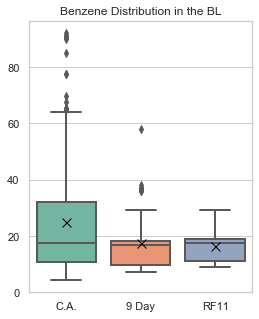

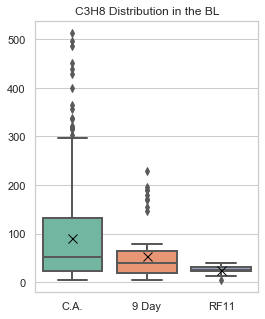

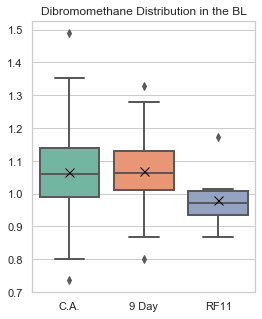

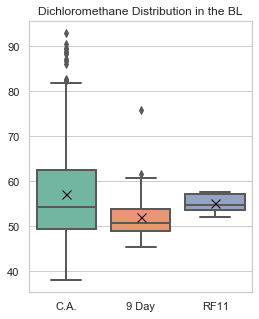

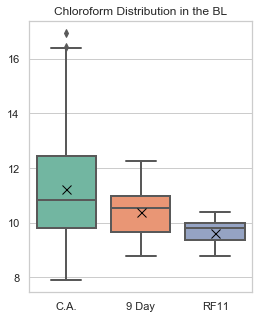

In [11]:
# plot 
where = 'BL'

make_bplot(BL_Benzene, 'Benzene', where)
make_bplot(BL_C3H8, 'C3H8', where)
make_bplot(BL_Dibromomethane, 'Dibromomethane', where)
make_bplot(BL_Dichloromethane, 'Dichloromethane', where)
make_bplot(BL_Chloroform, 'Chloroform', where)

In [12]:
########## plot location of sample 

In [13]:
# isolate data in UT for RF11 alone, and camp avg. 

### BL 
mybl_campavg = toga_df.loc[(toga_df['GGALT'] < 2000)]
mybl_campavg = mybl_campavg[['GGLAT', 'GGLON', 'Benzene', 'C3H8', 'Dibromomethane', 'Dichloromethane', 'Chloroform', 'Bromoform']]

mybl_9day = toga_df[toga_df['Flight'].isin(['RF11', 'RF10', 'RF09', 'RF08'])]
mybl_9day = mybl_9day[mybl_9day['GGALT'] < 2000]
mybl_9day = mybl_9day[['GGLAT', 'GGLON', 'Benzene', 'C3H8', 'Dibromomethane', 'Dichloromethane', 'Chloroform', 'Bromoform']]

mybl_rf11 = toga_df.loc[(toga_df['GGALT'] < 2000) & (toga_df['Flight'] == 'RF11')]
mybl_rf11 = mybl_rf11[['GGLAT', 'GGLON', 'Benzene', 'C3H8', 'Dibromomethane', 'Dichloromethane', 'Chloroform', 'Bromoform']]

### UT 
myut_rf11 = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                                          & (toga_df['Flight'] == 'RF11')]
myut_rf11 = myut_rf11[['GGLAT', 'GGLON', 'Benzene', 'C3H8', 'Dibromomethane', 'Dichloromethane', 'Chloroform', 'Bromoform']]

myut_campavg = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)]
myut_campavg = myut_campavg[['GGLAT', 'GGLON', 'Benzene', 'C3H8', 'Dibromomethane', 'Dichloromethane', 'Chloroform', 'Bromoform']]


Text(145.29, 13.94, 'Guam')

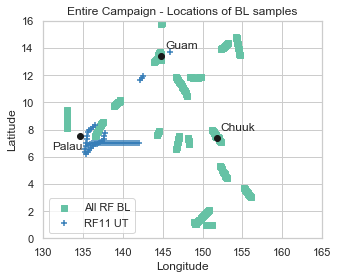

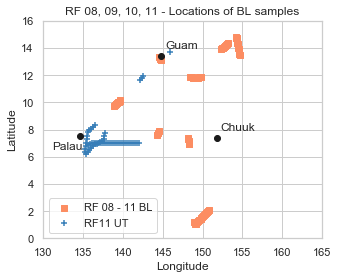

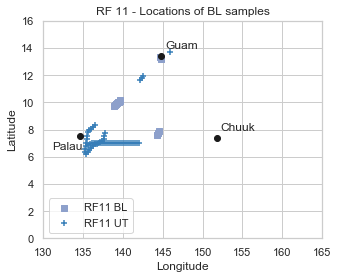

In [29]:
# PLOT BL SAMPLES 
# BL uses Set2 
a = sns.color_palette("Set2")[0]
b = sns.color_palette("Set2")[1]
c = sns.color_palette("Set2")[2]
d = sns.color_palette("Set1")[1]
e = sns.color_palette("Set1")[0]

# landmarks 
chuuk = [151.78, 7.4]
palau = [134.58, 7.51]
guam = [144.79, 13.44]

# --------------------------------------- camp avg bl 
fig, ax = plt.subplots(figsize=(5, 4))
ax.scatter(mybl_campavg['GGLON'], mybl_campavg['GGLAT'], marker = 's',
              color = a, label = 'All RF BL') 
ax.scatter(myut_rf11['GGLON'], myut_rf11['GGLAT'], marker = '+',
              color = d, label = 'RF11 UT') 
ax.legend(loc = 'lower left')
ax.set_xlim([130, 165])
ax.set_ylim([0, 16])
ax.set_title('Entire Campaign - Locations of BL samples')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# landmarks
ax.scatter(chuuk[0], chuuk[1], marker = 'o', color = 'k', label = 'Chuuk')
ax.text(chuuk[0]+0.5, chuuk[1]+0.5, 'Chuuk')
ax.scatter(palau[0], palau[1], marker = 'o', color = 'k', label = 'Chuuk')
ax.text(palau[0]-3.5, palau[1]-1, 'Palau')
ax.scatter(guam[0], guam[1], marker = 'o', color = 'k', label = 'Chuuk')
ax.text(guam[0]+0.5, guam[1]+0.5, 'Guam')

# --------------------------------------- 9 day bl 
fig, ax = plt.subplots(figsize=(5, 4))
ax.scatter(mybl_9day['GGLON'], mybl_9day['GGLAT'], marker = 's',
              color = b, label = 'RF 08 - 11 BL') 
ax.scatter(myut_rf11['GGLON'], myut_rf11['GGLAT'], marker = '+',
              color = d, label = 'RF11 UT') 
ax.legend(loc = 'lower left')
ax.set_xlim([130, 165])
ax.set_ylim([0, 16])
ax.set_title('RF 08, 09, 10, 11 - Locations of BL samples')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# landmarks
ax.scatter(chuuk[0], chuuk[1], marker = 'o', color = 'k', label = 'Chuuk')
ax.text(chuuk[0]+0.5, chuuk[1]+0.5, 'Chuuk')
ax.scatter(palau[0], palau[1], marker = 'o', color = 'k', label = 'Chuuk')
ax.text(palau[0]-3.5, palau[1]-1, 'Palau')
ax.scatter(guam[0], guam[1], marker = 'o', color = 'k', label = 'Chuuk')
ax.text(guam[0]+0.5, guam[1]+0.5, 'Guam')

# --------------------------------------- RF11 bl 
fig, ax = plt.subplots(figsize=(5, 4))
ax.scatter(mybl_rf11['GGLON'], mybl_rf11['GGLAT'], marker = 's',
              color = c, label = 'RF11 BL') 
ax.scatter(myut_rf11['GGLON'], myut_rf11['GGLAT'], marker = '+',
              color = d, label = 'RF11 UT') 
ax.legend(loc = 'lower left')
ax.set_xlim([130, 165])
ax.set_ylim([0, 16])
ax.set_title('RF 11 - Locations of BL samples')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# landmarks
ax.scatter(chuuk[0], chuuk[1], marker = 'o', color = 'k', label = 'Chuuk')
ax.text(chuuk[0]+0.5, chuuk[1]+0.5, 'Chuuk')
ax.scatter(palau[0], palau[1], marker = 'o', color = 'k', label = 'Chuuk')
ax.text(palau[0]-3.5, palau[1]-1, 'Palau')
ax.scatter(guam[0], guam[1], marker = 'o', color = 'k', label = 'Chuuk')
ax.text(guam[0]+0.5, guam[1]+0.5, 'Guam')


Text(145.29, 13.94, 'Guam')

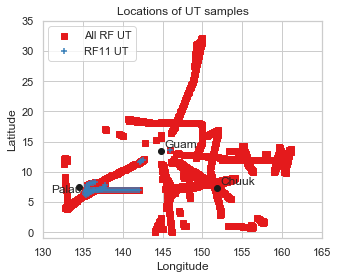

In [30]:

# UT samples 
fig, ax = plt.subplots(figsize=(5, 4))
ax.scatter(myut_campavg['GGLON'], myut_campavg['GGLAT'], marker = 's',
              color = e, label = 'All RF UT') 
ax.scatter(myut_rf11['GGLON'], myut_rf11['GGLAT'], marker = '+',
              color = d, label = 'RF11 UT') 
ax.legend(loc = 'upper left')
ax.set_xlim([130, 165])
ax.set_ylim([-1, 35])
ax.set_title('Locations of UT samples')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# landmarks
ax.scatter(chuuk[0], chuuk[1], marker = 'o', color = 'k', label = 'Chuuk')
ax.text(chuuk[0]+0.5, chuuk[1]+0.5, 'Chuuk')
ax.scatter(palau[0], palau[1], marker = 'o', color = 'k', label = 'Chuuk')
ax.text(palau[0]-3.5, palau[1]-1, 'Palau')
ax.scatter(guam[0], guam[1], marker = 'o', color = 'k', label = 'Chuuk')
ax.text(guam[0]+0.5, guam[1]+0.5, 'Guam')
